<a href="https://colab.research.google.com/github/dwikagt/SKRIPSI_P2P_STACKINGGA/blob/main/FINAL_Uji1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [55]:
!pip install -q hvplot

In [56]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [59]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomTreesEmbedding
#from sklearn.neighbors import BallTree
#from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

# 📚Data Collection

In [60]:
df = pd.read_csv('/content/loan_data.csv',  delimiter=',')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0
1,1,credit_card,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0
2,1,debt_consolidation,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0
3,1,debt_consolidation,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0
4,1,credit_card,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0


In [61]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


# ❓ Exploratory Data Analysis

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


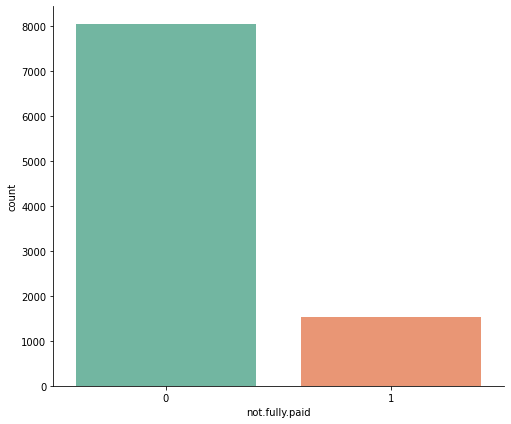

In [63]:
sns.catplot(kind='count',x='not.fully.paid',height=6, aspect=1.2,data=df,palette='Set2')
plt.show()

In [64]:
df["not.fully.paid"].value_counts(dropna= False)

0    8045
1    1533
Name: not.fully.paid, dtype: int64

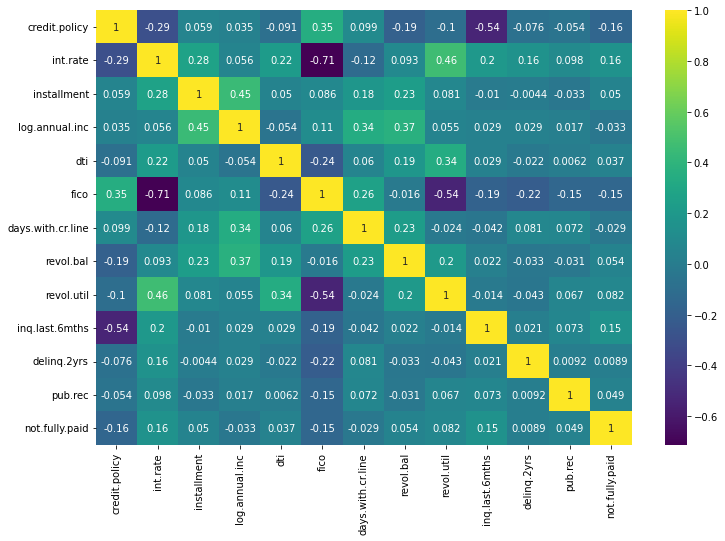

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Installment memiliki korelasi baik dengan log.annual.inc; fico dengan credit policy; revol.util dan int.rate; logannual.inc dan revo.bal

In [66]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


In [67]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [68]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [69]:
df['installment'].value_counts()

317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64

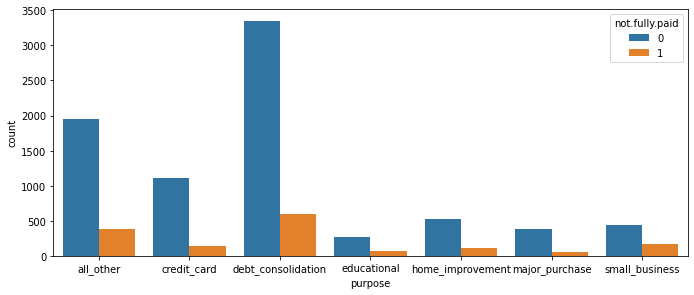

In [70]:
plt.figure(figsize=(25, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.purpose.unique().tolist())
sns.countplot(x='purpose', data=df, hue='not.fully.paid', order=grade)

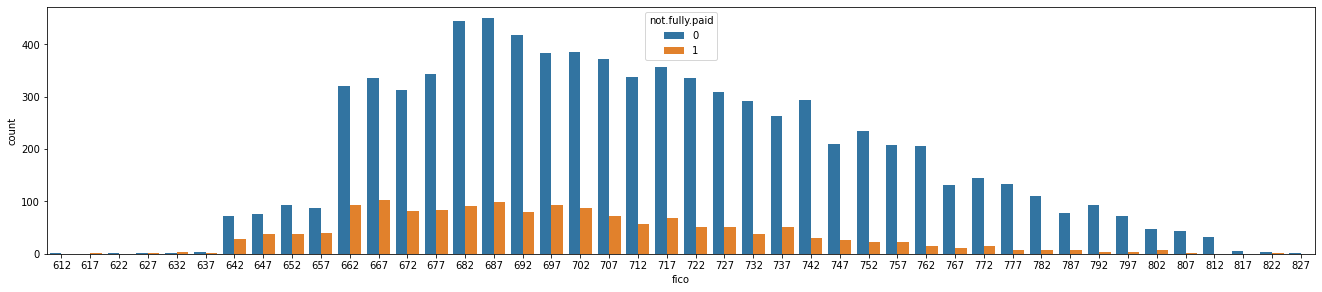

In [71]:
plt.figure(figsize=(50, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.fico.unique().tolist())
sns.countplot(x='fico', data=df, hue='not.fully.paid', order=grade)

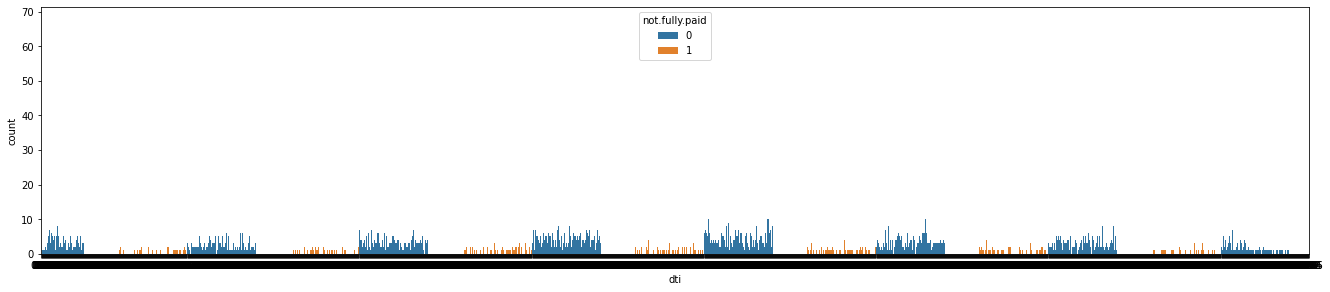

In [72]:
plt.figure(figsize=(50, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.dti.unique().tolist())
sns.countplot(x='dti', data=df, hue='not.fully.paid', order=grade)

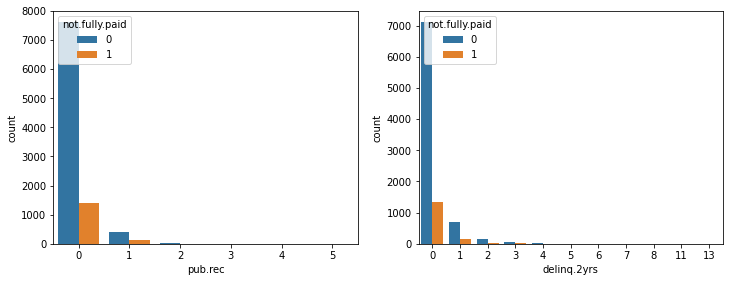

In [73]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub.rec', data=df, hue='not.fully.paid')

plt.subplot(6, 2, 2)
sns.countplot(x='delinq.2yrs', data=df, hue='not.fully.paid')

# 🎯Preprocessing Data

In [74]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (9578, 14)


In [75]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

Tidak ada missing value, sehingga tidak perlu ada handling

In [76]:
print([column for column in df.columns if df[column].dtype == object])

['purpose']


Variabel data merupakan objek/data kategori sehingga perlu adanya dummy step

In [77]:
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [78]:
df2=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0,0,1,0,0,0,0
1,1,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0,1,0,0,0,0,0
2,1,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0,0,1,0,0,0,0
3,1,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0,0,1,0,0,0,0
4,1,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.15,344.76,12.18,10.39,672,10474.00,215372,82.10,2,0,0,1,0,0,0,0,0,0
9574,0,0.13,257.70,11.14,0.21,722,4380.00,184,1.10,5,0,0,1,0,0,0,0,0,0
9575,0,0.11,97.81,10.60,13.09,687,3450.04,10036,82.90,8,0,0,1,0,1,0,0,0,0
9576,0,0.16,351.58,10.82,19.18,692,1800.00,0,3.20,5,0,0,1,0,0,0,1,0,0


In [79]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


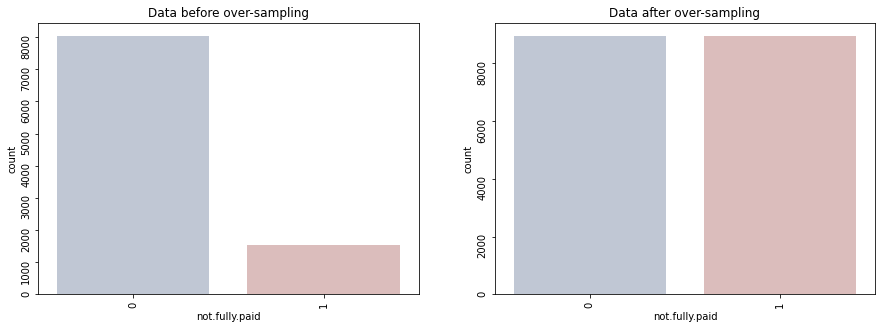

Data before over-sampling
0    8045
1    1533
Name: not.fully.paid, dtype: int64 

Data after over-sampling
0    8959
1    8959
Name: not.fully.paid, dtype: int64


In [80]:
# over-sampling
loan_data = df2
X = loan_data.iloc[:,:-1]
y = loan_data.iloc[:,-1]

res = RandomOverSampler(random_state=42)
x_res, y_res = res.fit_resample(X, y)

loan_data = x_res
loan_data['not.fully.paid'] = y_res


#visualazing samples
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not.fully.paid', data=df2, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not.fully.paid', data=loan_data, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(df2['not.fully.paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_data['not.fully.paid'].value_counts())

# 🔪TrainTestSplit

In [81]:
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

In [82]:
X.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
dtype: object

# 📊 Modelling

In [83]:

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [84]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [85]:
clf1 = XGBClassifier()
XGB = cross_val_score(clf1, X,y, cv=10, scoring = "accuracy")
y_pred = cross_val_predict(clf1, X,y, cv=10)
for i in range(10):
  print("Akurasi dari XGBoost : {0:2%}". format(XGB[i,]))
print("Rata-rata Akurasi dari XGBoost:", XGB.mean())
print("Akurasi Terbaik: ", XGB.max())
print(f"Confusion Matrix: \n {confusion_matrix(y, y_pred)}\n")

Akurasi dari XGBoost : 90.848214%
Akurasi dari XGBoost : 90.513393%
Akurasi dari XGBoost : 87.779018%
Akurasi dari XGBoost : 88.002232%
Akurasi dari XGBoost : 93.303571%
Akurasi dari XGBoost : 91.071429%
Akurasi dari XGBoost : 90.569196%
Akurasi dari XGBoost : 90.513393%
Akurasi dari XGBoost : 90.954774%
Akurasi dari XGBoost : 86.711334%
Rata-rata Akurasi dari XGBoost: 0.9002665547479461
Akurasi Terbaik:  0.9330357142857143
Confusion Matrix: 
 [[7357 1602]
 [ 185 8774]]



In [86]:
clf2 = LGBMClassifier()
LGBM = cross_val_score(clf2, X, y, cv=10, scoring = "accuracy")
y_pred = cross_val_predict(clf2, X,y, cv=10)
for i in range(10):
  print("Akurasi dari LightGBM : {0:2%}". format(LGBM[i,]))
print("Rata-rata Akurasi dari LightGBM: ", LGBM.mean())
print("Akurasi Terbaik: ", LGBM.max())
print(f"Confusion Matrix: \n {confusion_matrix(y, y_pred)}\n")

Akurasi dari LightGBM : 97.209821%
Akurasi dari LightGBM : 96.875000%
Akurasi dari LightGBM : 93.080357%
Akurasi dari LightGBM : 94.810268%
Akurasi dari LightGBM : 97.767857%
Akurasi dari LightGBM : 96.875000%
Akurasi dari LightGBM : 96.763393%
Akurasi dari LightGBM : 95.982143%
Akurasi dari LightGBM : 95.309883%
Akurasi dari LightGBM : 91.792295%
Rata-rata Akurasi dari LightGBM:  0.9564660168401533
Akurasi Terbaik:  0.9776785714285714
Confusion Matrix: 
 [[8179  780]
 [   0 8959]]



In [87]:
clf3 = GradientBoostingClassifier()
GBDT = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
y_pred = cross_val_predict(clf3, X,y, cv=10)
for i in range(10):
  print("Akurasi dari GBDT : {0:2%}". format(GBDT[i,]))
print("Rata-rata Akurasi dari GBDT: ", GBDT.mean())
print("Akurasi Terbaik: ", GBDT.max())
print(f"Confusion Matrix: \n {confusion_matrix(y, y_pred)}\n")

Akurasi dari GBDT : 91.573661%
Akurasi dari GBDT : 90.904018%
Akurasi dari GBDT : 87.723214%
Akurasi dari GBDT : 88.392857%
Akurasi dari GBDT : 93.470982%
Akurasi dari GBDT : 91.406250%
Akurasi dari GBDT : 90.513393%
Akurasi dari GBDT : 90.457589%
Akurasi dari GBDT : 91.010609%
Akurasi dari GBDT : 87.604690%
Rata-rata Akurasi dari GBDT:  0.9030572630015156
Akurasi Terbaik:  0.9347098214285714
Confusion Matrix: 
 [[7410 1549]
 [ 187 8772]]



In [88]:
estimators = [
      ('gbdt', GradientBoostingClassifier()),
      ('xgb', XGBClassifier()),
      ('lgb', LGBMClassifier())
]

clf4 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
y_pred = cross_val_predict(clf4, X,y, cv=10)
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
print(f"Confusion Matrix: \n {confusion_matrix(y, y_pred)}\n")

Akurasi dari STACKING : 98.883929%
Akurasi dari STACKING : 99.386161%
Akurasi dari STACKING : 97.265625%
Akurasi dari STACKING : 98.270089%
Akurasi dari STACKING : 99.330357%
Akurasi dari STACKING : 98.995536%
Akurasi dari STACKING : 98.995536%
Akurasi dari STACKING : 98.381696%
Akurasi dari STACKING : 96.984925%
Akurasi dari STACKING : 94.081519%
Rata-rata Akurasi dari STACKING:  0.9805753718991784
Akurasi Terbaik:  0.9938616071428571
Confusion Matrix: 
 [[8629  330]
 [  18 8941]]

